In [394]:
import numpy as np
import networkx as nx
import classes.nb_general as NB_G
import scipy.linalg as la
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

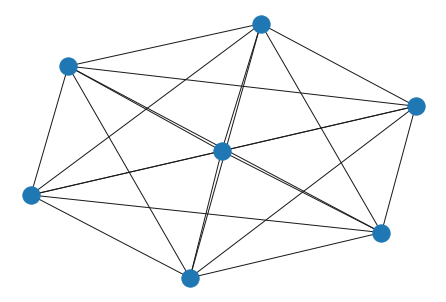

In [396]:
A_graph = nx.complete_graph(7)
nx.draw(A_graph)

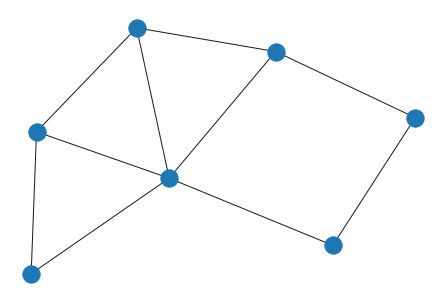

In [401]:
B_graph = nx.gnm_random_graph(7,10)
nx.draw(B_graph)

In [402]:
C_graph = nx.Graph()
C_graph.add_edges_from([(0,1),(1,2),(2,0),(3,2),(3,4),(4,5),(5,6),(6,2)])

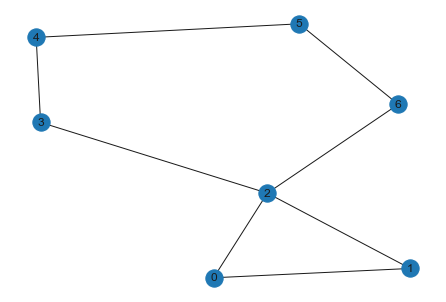

In [403]:
nx.draw(C_graph, with_labels=True)

# Testing Stability & Similarity Of Algorithims

In [406]:
def test_stability(G, eps=.9):
    """ Given a graph G, computes the page rank vector in various methods and checks for stability. """
    
    plt.figure(figsize=(10,5))
    plt.title("Original Graph", fontsize=18)
    nx.draw(G, with_labels=True)
    plt.show()
    
    # Find L, R, and B
    A = nx.to_numpy_array(G)
    L, T = NB_G.create_s_t(G)
    R = T.T
    D = np.diag(np.inner(A,np.ones(len(G.nodes))))
    C, B = NB_G.to_edge_space(G,graph=False,B = True)
    W_ = R@L.T
    D_ = np.diag(W_@np.ones(W_.shape[0]))
    
    # As given in section 3.1 of the Springer Paper
    pi = np.dot(R@la.pinv(R.T@R), np.ones(len(G.nodes)))/len(G.nodes)
    personalization_vec = dict(zip(np.arange(0,len(G.nodes),1), pi))
    #personalization_vec = dict(zip(np.arange(0,len(G.nodes),1), [1/(2*len(G.edges()))]*len(G.nodes)))

    plt.figure(figsize=(10,5))
    plt.title("Starting Distribution - Edges", fontsize=18)
    plt.plot(pi)
    plt.xlabel("Edges")
    plt.ylabel("Probability")
    plt.show()
        
    # Normal Page Rank
    # -- Networkx, Dual Space
    nx_x = nx.pagerank(nx.from_numpy_array(C,create_using=nx.DiGraph), alpha=eps, tol=1e-8, max_iter=250)
    nx_xp = nx.pagerank(nx.from_numpy_array(C,create_using=nx.DiGraph), alpha=eps, tol=1e-8, max_iter=250, personalization=personalization_vec)
    
    # -- Analytical, Dual Space
    pr_x = la.solve(np.eye(R.shape[0])-eps*W_.T@la.inv(D_),((1-eps)/la.norm(pi,ord=1))*pi)
    
    
    plt.figure(figsize=(10,5))
    plt.title('Dual Space', fontsize=18)
    # Fix this
    plt.plot(list(nx_x.values()), label='Nx - Uniform')
    
    plt.plot(list(nx_xp.values()), label='Nx - Personalized')
    plt.plot(pr_x, label='Analytical')
    plt.legend(loc='best')
    plt.show()
    
    # -- Numerical, Vertex Space
    vertex_pr_primal_x = np.array(list(nx.pagerank(nx.Graph(G),alpha=eps,max_iter=250, tol=1e-8).values()))
    vertex_pr_primal_xp = np.array(list(nx.pagerank(nx.Graph(G),alpha=eps,max_iter=250, tol=1e-8,
                                                    personalization=dict(zip(np.arange(0,len(G.nodes),1), np.diag(T)/np.sum(np.diag(T))))
                                                    ).values()))
    vertex_pr = R.T@pr_x

    plt.figure(figsize=(10,5))
    plt.title('Vertex Space', fontsize=18)
    plt.plot(vertex_pr_primal_x, label='Nx - Uniform')
    plt.plot(vertex_pr_primal_xp, label='Nx - Personalized')
    plt.plot(R.T@np.array(list(nx_x.values())), label='Nx - Projected', alpha=.5)
    plt.plot(vertex_pr, label='Projection Analytical', alpha=.5)
    plt.legend(loc='best')
    plt.show()
    
    

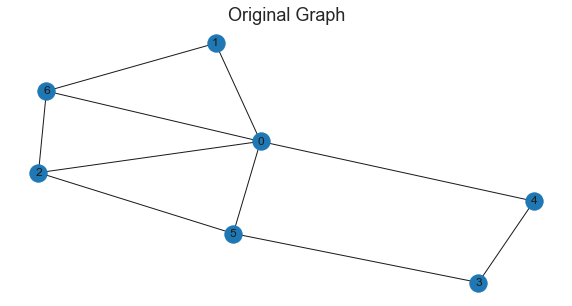

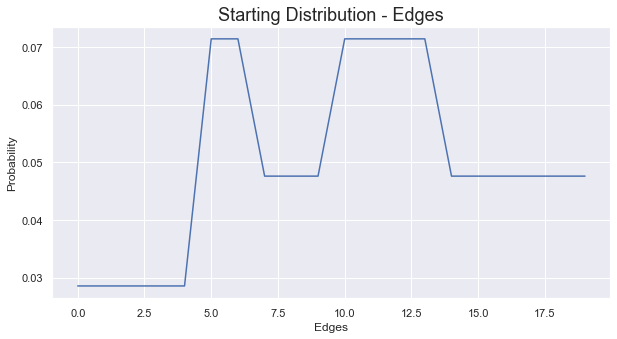

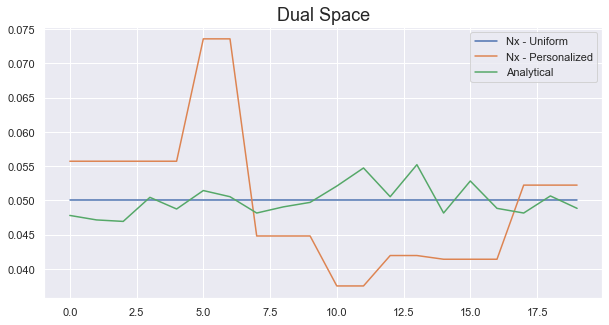

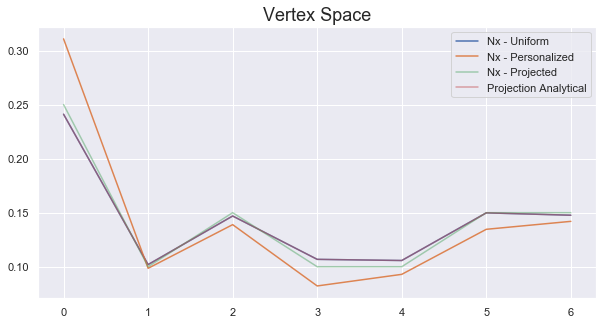

In [405]:
test_stability(B_graph)

In [322]:
A = nx.complete_graph(100)
x = nx.pagerank(A, personalization=dict(zip(np.arange(0,99,1), [.01]*100)))
y = nx.pagerank(A)

In [324]:
y

{0: 0.009999999999999981,
 1: 0.009999999999999981,
 2: 0.009999999999999981,
 3: 0.009999999999999981,
 4: 0.009999999999999981,
 5: 0.009999999999999981,
 6: 0.009999999999999981,
 7: 0.009999999999999981,
 8: 0.009999999999999981,
 9: 0.009999999999999981,
 10: 0.009999999999999981,
 11: 0.009999999999999981,
 12: 0.009999999999999981,
 13: 0.009999999999999981,
 14: 0.009999999999999981,
 15: 0.009999999999999981,
 16: 0.009999999999999981,
 17: 0.009999999999999981,
 18: 0.009999999999999981,
 19: 0.009999999999999981,
 20: 0.009999999999999981,
 21: 0.009999999999999981,
 22: 0.009999999999999981,
 23: 0.009999999999999981,
 24: 0.009999999999999981,
 25: 0.009999999999999981,
 26: 0.009999999999999981,
 27: 0.009999999999999981,
 28: 0.009999999999999981,
 29: 0.009999999999999981,
 30: 0.009999999999999981,
 31: 0.009999999999999981,
 32: 0.009999999999999981,
 33: 0.009999999999999981,
 34: 0.009999999999999981,
 35: 0.009999999999999981,
 36: 0.009999999999999981,
 37: 0.0099

In [325]:
x

{0: 0.010015021426385074,
 1: 0.010015021426385074,
 2: 0.010015021426385074,
 3: 0.010015021426385074,
 4: 0.010015021426385074,
 5: 0.010015021426385074,
 6: 0.010015021426385074,
 7: 0.010015021426385074,
 8: 0.010015021426385074,
 9: 0.010015021426385074,
 10: 0.010015021426385074,
 11: 0.010015021426385074,
 12: 0.010015021426385074,
 13: 0.010015021426385074,
 14: 0.010015021426385074,
 15: 0.010015021426385074,
 16: 0.010015021426385074,
 17: 0.010015021426385074,
 18: 0.010015021426385074,
 19: 0.010015021426385074,
 20: 0.010015021426385074,
 21: 0.010015021426385074,
 22: 0.010015021426385074,
 23: 0.010015021426385074,
 24: 0.010015021426385074,
 25: 0.010015021426385074,
 26: 0.010015021426385074,
 27: 0.010015021426385074,
 28: 0.010015021426385074,
 29: 0.010015021426385074,
 30: 0.010015021426385074,
 31: 0.010015021426385072,
 32: 0.010015021426385072,
 33: 0.010015021426385072,
 34: 0.010015021426385072,
 35: 0.01001502142638507,
 36: 0.01001502142638507,
 37: 0.010015

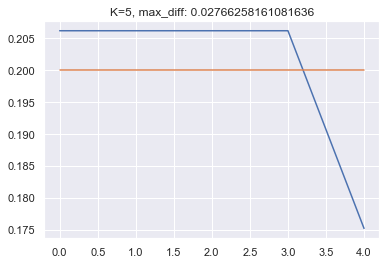

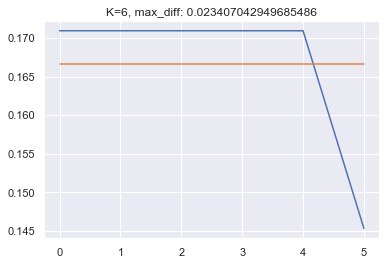

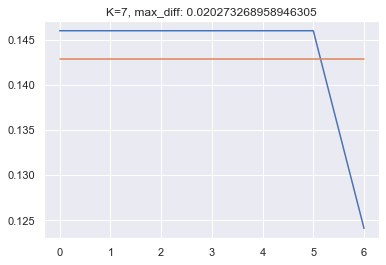

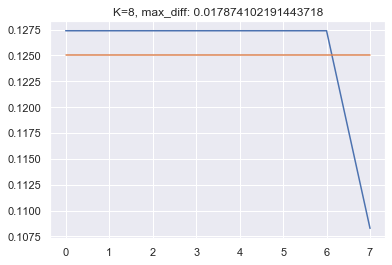

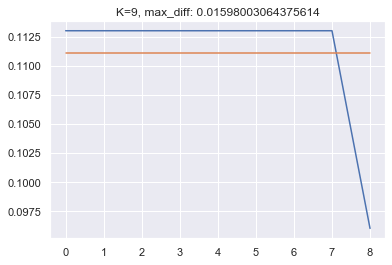

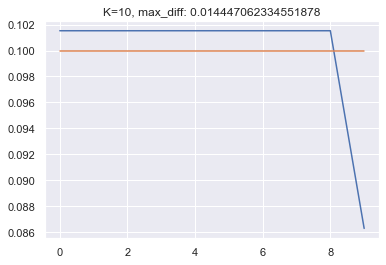

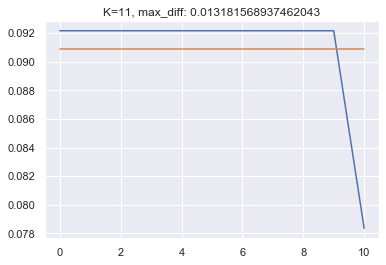

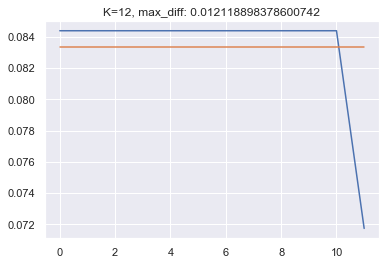

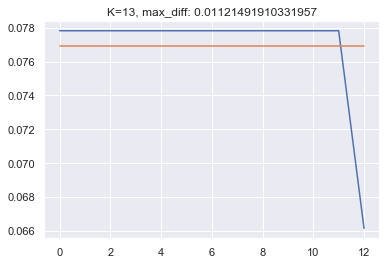

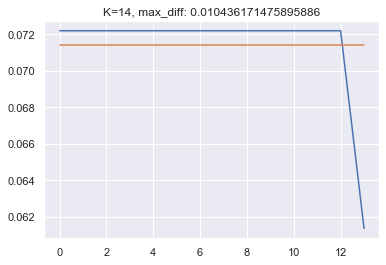

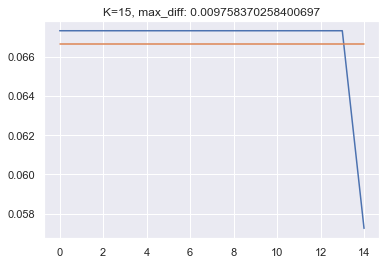

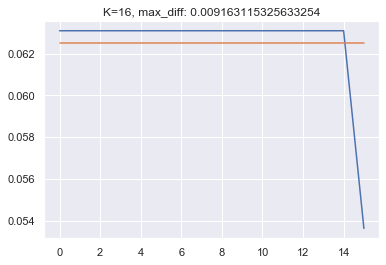

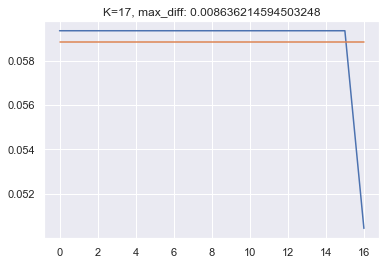

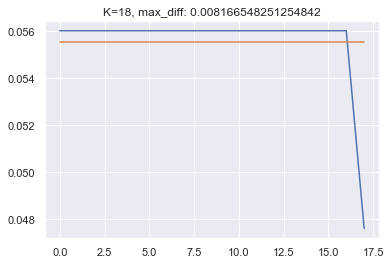

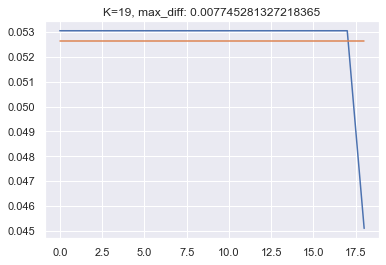

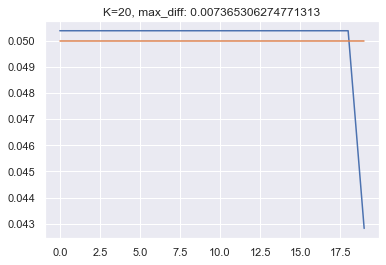

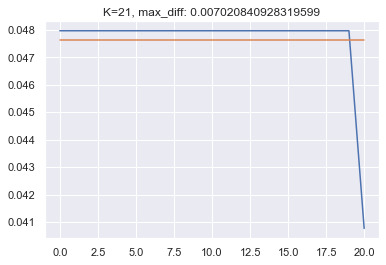

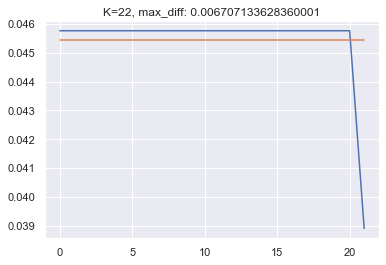

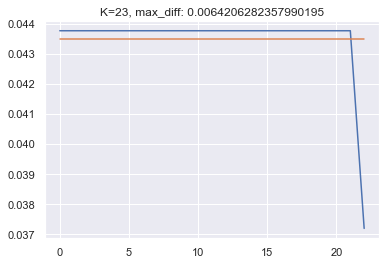

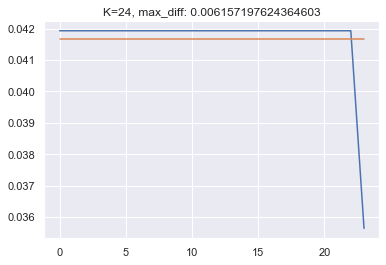

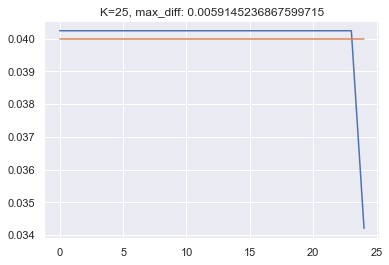

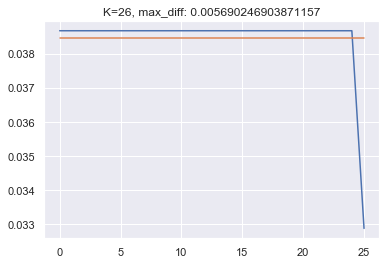

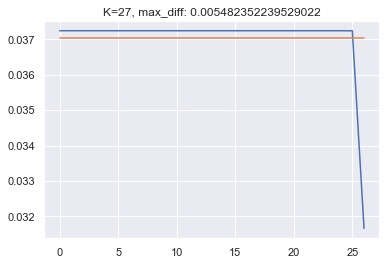

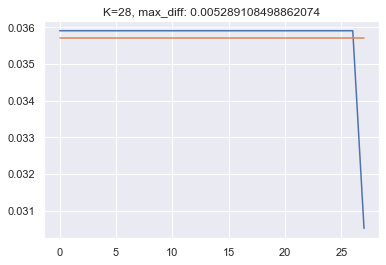

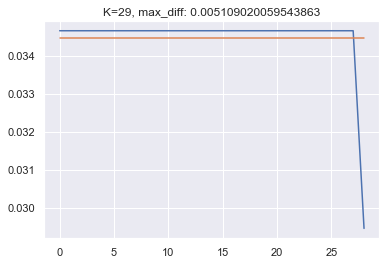

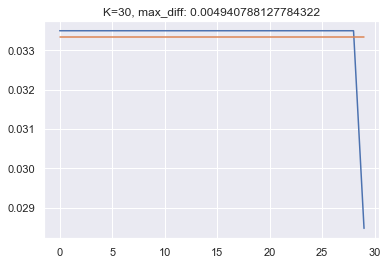

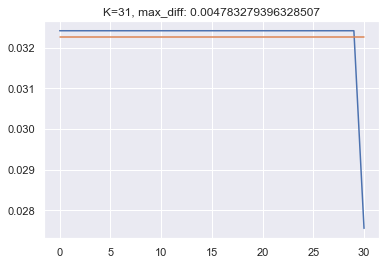

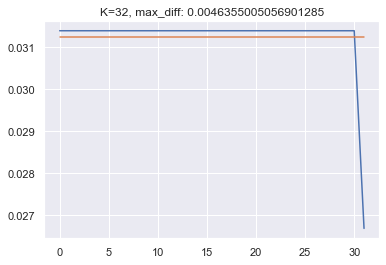

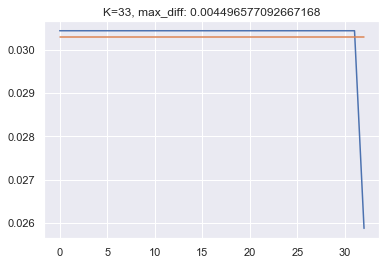

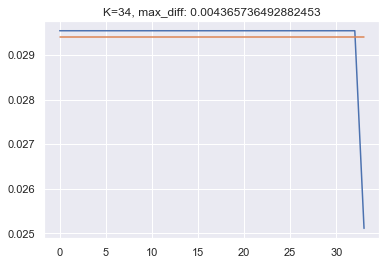

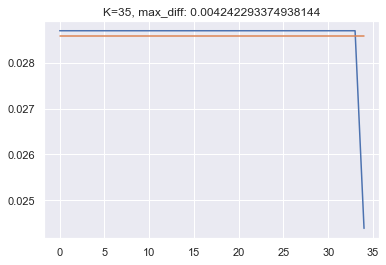

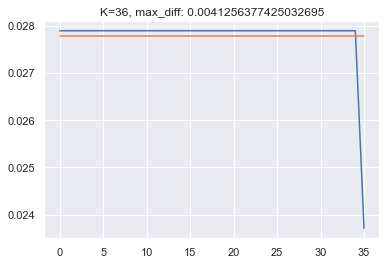

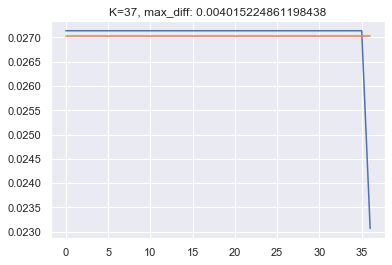

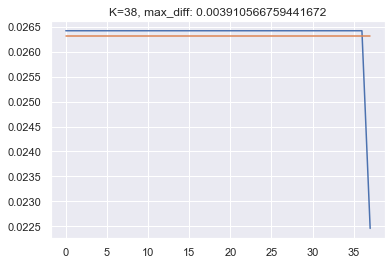

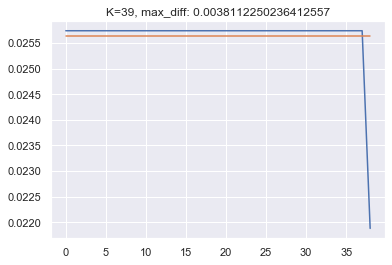

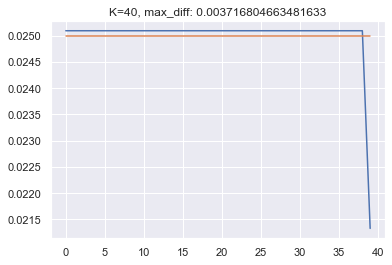

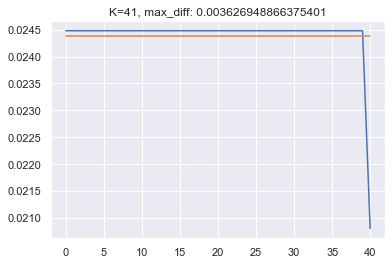

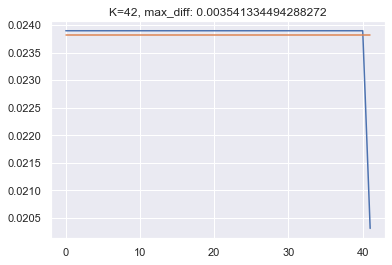

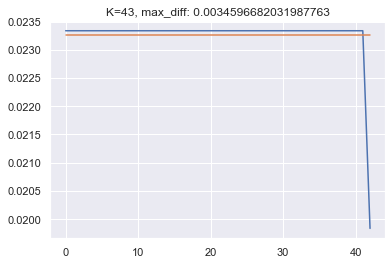

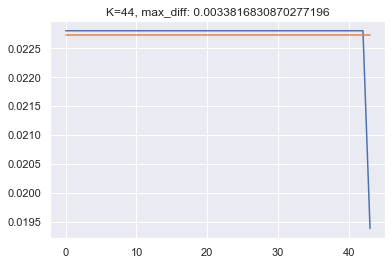

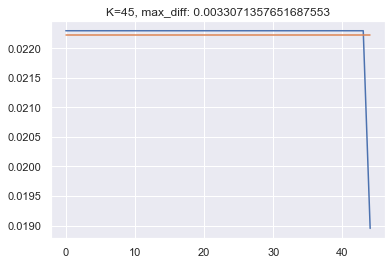

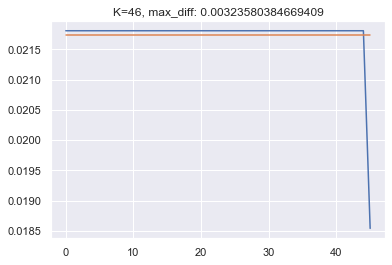

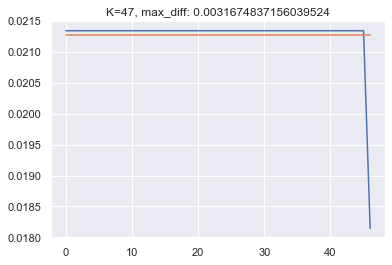

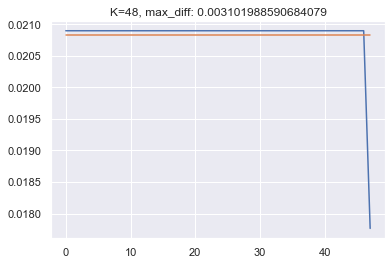

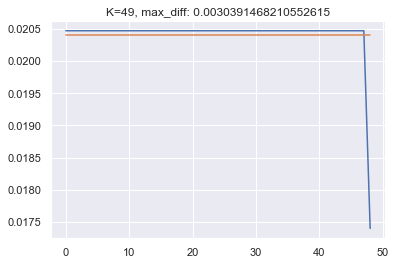

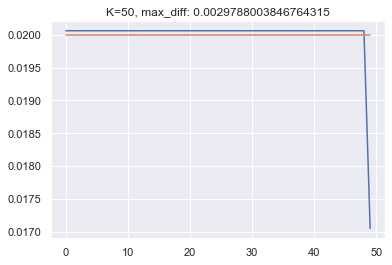

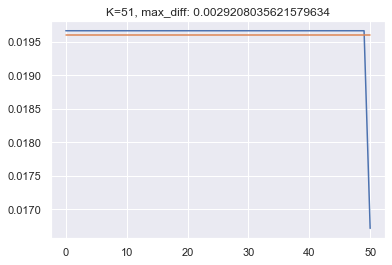

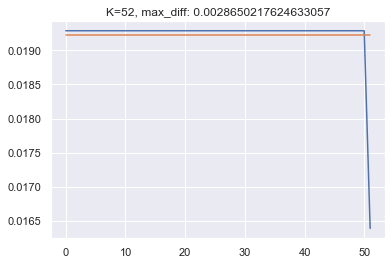

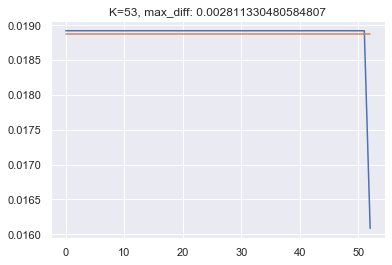

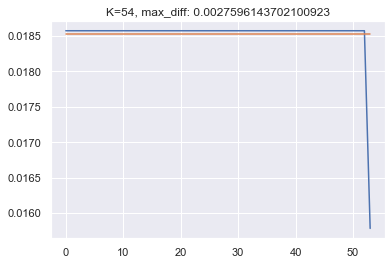

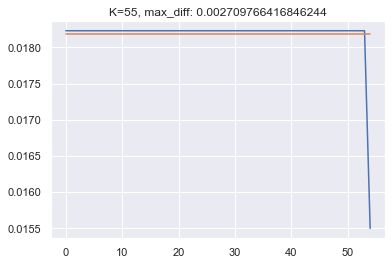

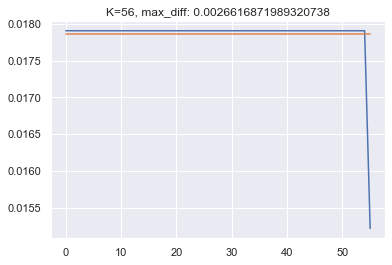

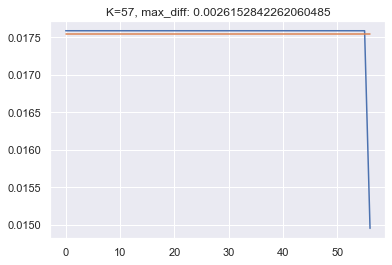

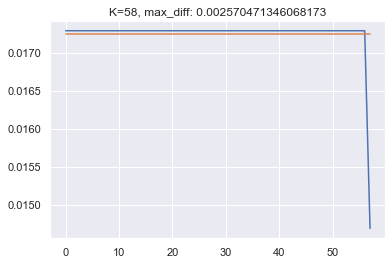

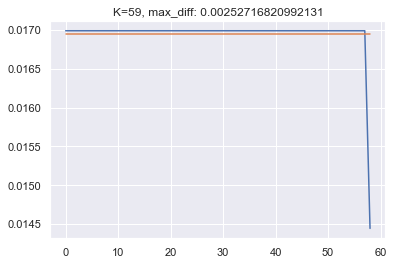

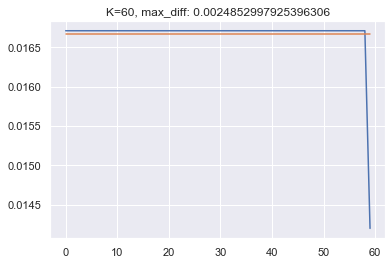

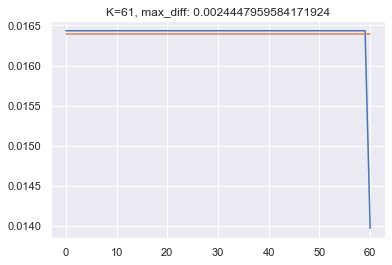

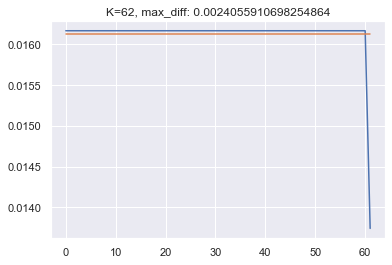

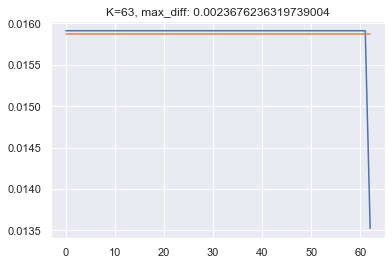

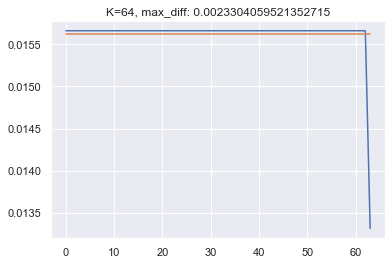

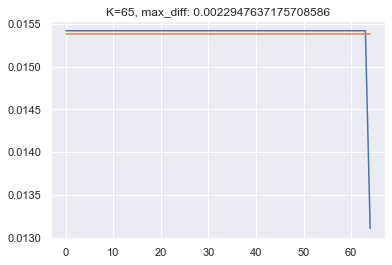

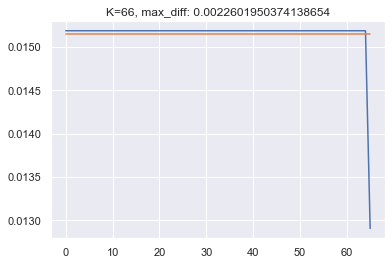

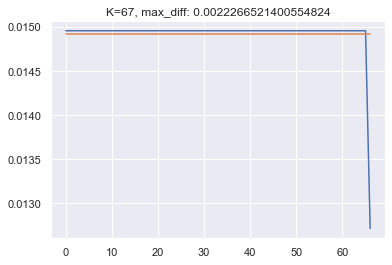

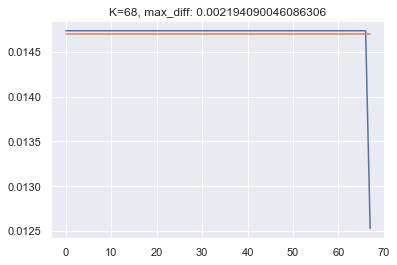

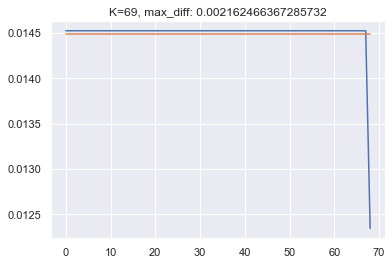

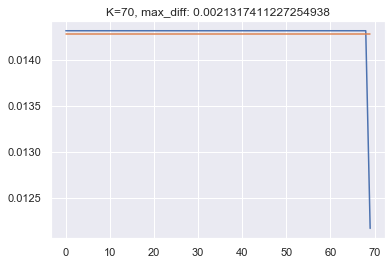

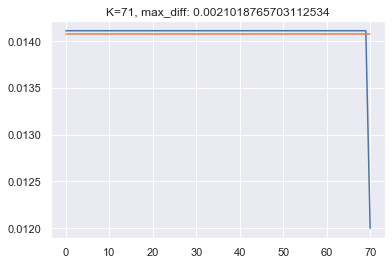

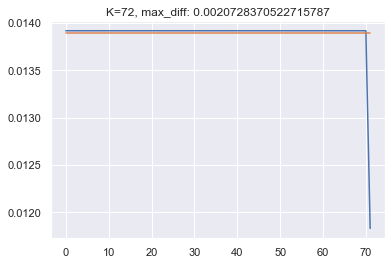

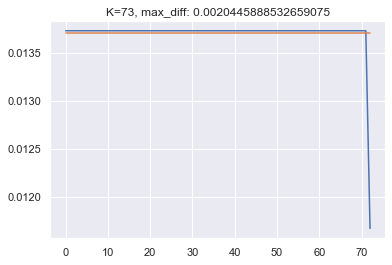

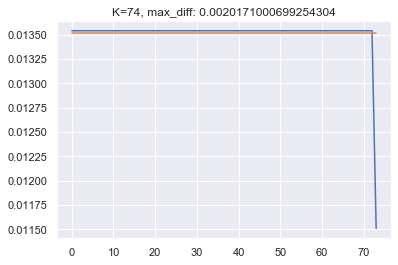

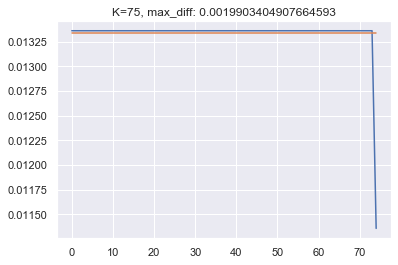

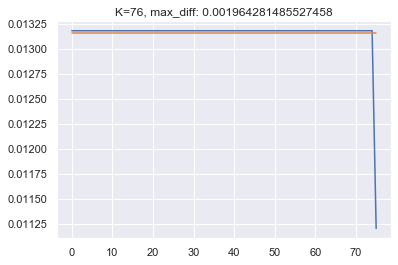

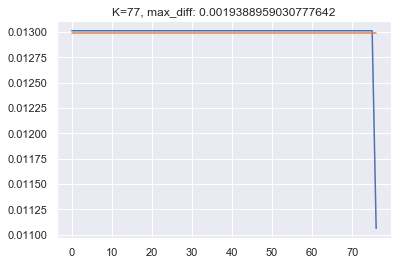

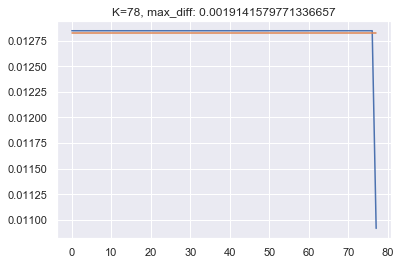

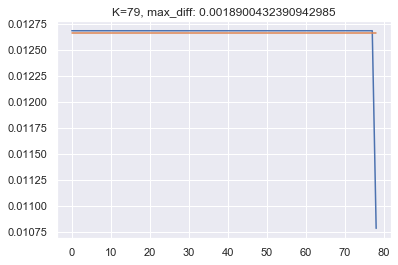

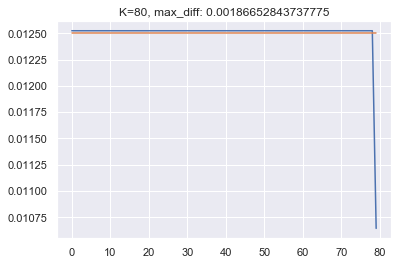

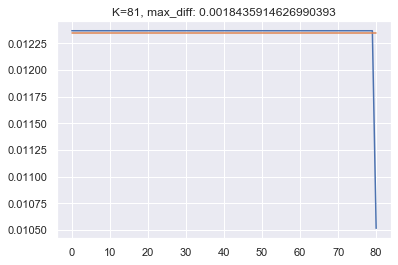

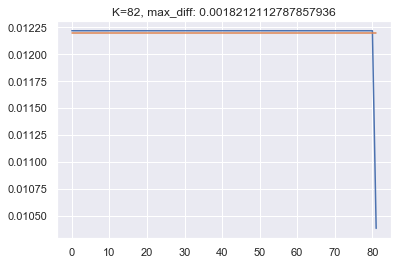

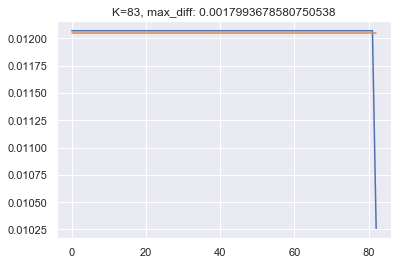

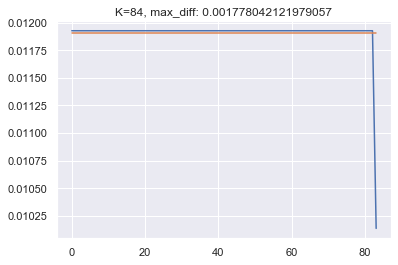

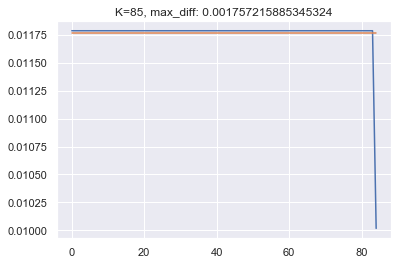

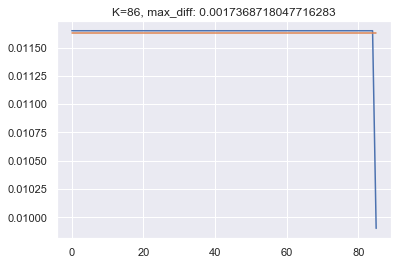

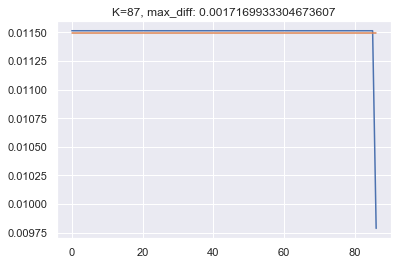

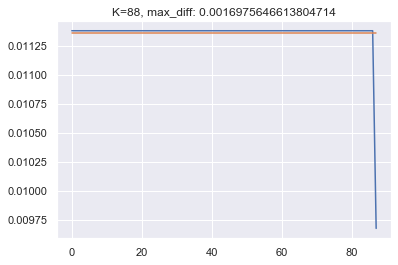

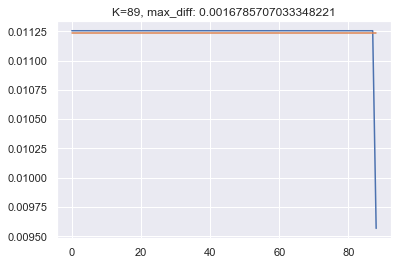

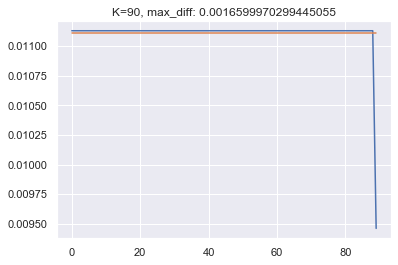

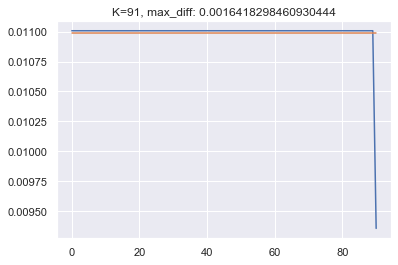

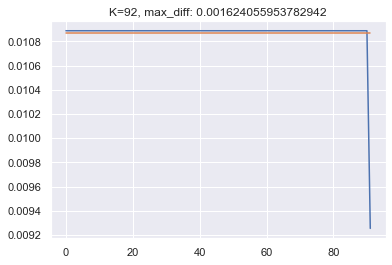

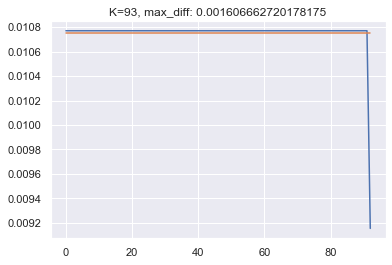

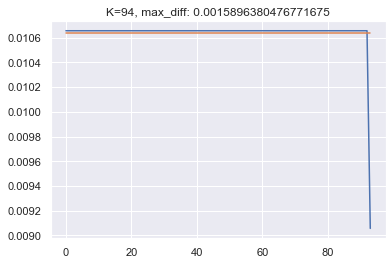

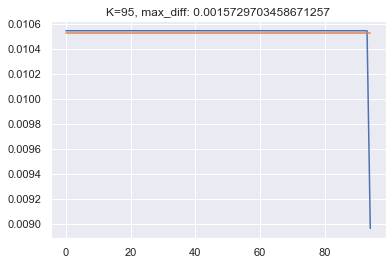

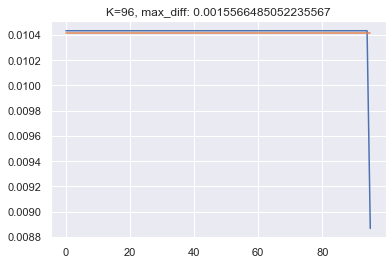

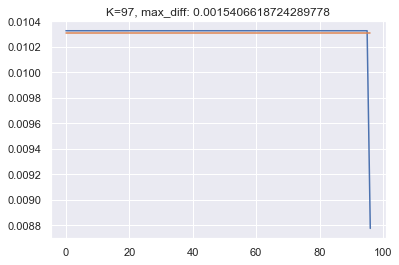

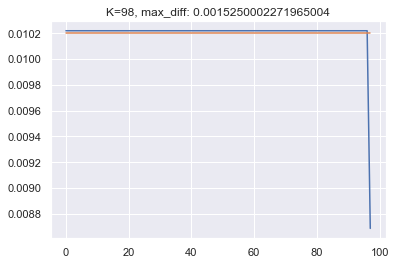

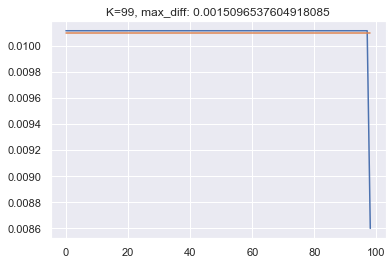

In [335]:
for k in range(5,100):
    
    A = nx.complete_graph(k)
    x = nx.pagerank(A, personalization=dict(zip(np.arange(0,k-1,1), [1/k]*k)))
    y = nx.pagerank(A)

    plt.title("K={}, max_diff: {}".format(k, la.norm(np.array(list(x.values()))-np.array(list(y.values()))), ord=1))
    plt.plot(list(x.values())) # Fed in personalization
    plt.plot(list(y.values()))
    plt.show()

In [334]:
np.array(list(x.values()))

array([0.01001502, 0.01001502, 0.01001502, 0.01001502, 0.01001502,
       0.01001502, 0.01001502, 0.01001502, 0.01001502, 0.01001502,
       0.01001502, 0.01001502, 0.01001502, 0.01001502, 0.01001502,
       0.01001502, 0.01001502, 0.01001502, 0.01001502, 0.01001502,
       0.01001502, 0.01001502, 0.01001502, 0.01001502, 0.01001502,
       0.01001502, 0.01001502, 0.01001502, 0.01001502, 0.01001502,
       0.01001502, 0.01001502, 0.01001502, 0.01001502, 0.01001502,
       0.01001502, 0.01001502, 0.01001502, 0.01001502, 0.01001502,
       0.01001502, 0.01001502, 0.01001502, 0.01001502, 0.01001502,
       0.01001502, 0.01001502, 0.01001502, 0.01001502, 0.01001502,
       0.01001502, 0.01001502, 0.01001502, 0.01001502, 0.01001502,
       0.01001502, 0.01001502, 0.01001502, 0.01001502, 0.01001502,
       0.01001502, 0.01001502, 0.01001502, 0.01001502, 0.01001502,
       0.01001502, 0.01001502, 0.01001502, 0.01001502, 0.01001502,
       0.01001502, 0.01001502, 0.01001502, 0.01001502, 0.01001